<a href="https://colab.research.google.com/github/Akshay-Jak/-ML-MINOR-JAN/blob/main/ML-MINOR-JAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TO KNOW THE RUNTIME OF EACH CELL IN GCOLAB
!pip install ipython-autotime
%load_ext autotime

time: 154 µs (started: 2021-02-20 16:12:14 +00:00)


In [ ]:
# 1. Gather the Data
!pip install bing-image-downloader

time: 2.94 s (started: 2021-02-20 16:12:14 +00:00)


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("dog",limit = 30,output_dir = 'images',adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://jooinn.com/images/dog-67.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Australian_Catle_Dog_Silverbarn's_Paavo.jpg/1200px-Australian_Catle_Dog_Silverbarn's_Paavo.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://d1nvdmt0osh3cv.cloudfront.net/media/catalog/product/cache/1/k/a/e/image/1800x1800/acd9cc645a7ef0ba358bd1c2969a48c8/els1312-bla.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://petskb.com/wp-content/uploads/2019/08/dog-excited.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.k9web.com/wp-content/uploads/2019/01/basenjis-dog.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://img.thrfun.com/img/083/608/panting_dog_x1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.organicauthority.com/.image/t_share/MTU5MzI5NjYxMTcwNjIzNzAy/img_5121.

In [ ]:
from bing_image_downloader import downloader
downloader.download("wolf",limit = 30,output_dir = 'images',adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://wallup.net/wp-content/uploads/2016/01/201703-nature-animals-wolf.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://weknowyourdreams.com/images/wolf/wolf-11.jpg
[!] Issue getting: https://weknowyourdreams.com/images/wolf/wolf-11.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
[%] Downloading Image #2 from https://scx2.b-cdn.net/gfx/news/hires/2019/graywolf.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://i0.wp.com/predatorsoftheheart.com/wp-content/uploads/2019/01/WOLF-ENCOUNTER-5.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://nywolf.org/wp-content/uploads/2019/12/Mexican_gray_wolf_family.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.outdoorhub.com/wp-content/uploads/sites/2/2015/05/outdoorhub-oregons-newest-wolf-pack-may-growing-2015-05-21_18-50-02.jpg
[%] File Downl

In [ ]:
# 2. Preprocess Data
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORY = ['dog','wolf']

for category in CATEGORY:
  class_num = CATEGORY.index(category) # Label Encoder
  path = os.path.join(DATADIR,category) # Creating a path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape) # to get the (height,width,depth)
    # plt.imshow(img_array)# to get the image 
    img_resized = resize(img_array,(150,150,3)) # Normalises the pixel values which are 0-255 to 0-1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

  Flat_data =np.array(flat_data)
  Target = np.array(target)
  Images = np.array(images)



time: 28.1 s (started: 2021-02-20 16:14:07 +00:00)


In [ ]:
Flat_data[0]

array([0.        , 0.        , 0.        , ..., 0.04705882, 0.00176471,
       0.        ])

time: 5.23 ms (started: 2021-02-20 16:14:35 +00:00)


In [ ]:
len(Flat_data[0])

67500

time: 4.42 ms (started: 2021-02-20 16:14:35 +00:00)


In [ ]:
150*150*3

67500

time: 4.13 ms (started: 2021-02-20 16:14:35 +00:00)


In [ ]:
Target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 4.46 ms (started: 2021-02-20 16:15:14 +00:00)


<BarContainer object of 2 artists>

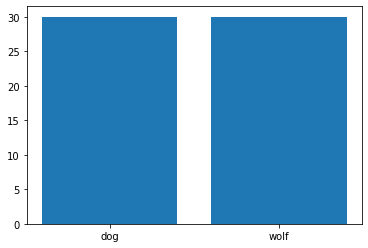

time: 159 ms (started: 2021-02-20 16:15:09 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts = True)
plt.bar(CATEGORY,count)

In [ ]:
#Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Flat_data,Target,
                                                 test_size = 0.3,random_state=109) 

time: 179 ms (started: 2021-02-20 16:15:20 +00:00)


In [ ]:
# 3. Apply classification Algorithm with best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
para_grid = [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,para_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 41.9 s (started: 2021-02-20 16:15:21 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred


array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

time: 91.6 ms (started: 2021-02-20 16:16:03 +00:00)


In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 3.39 ms (started: 2021-02-20 16:16:03 +00:00)


In [ ]:
# 4. Evaluating model using Confusion Matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix


time: 1.34 ms (started: 2021-02-20 16:16:03 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.7222222222222222

time: 3.78 ms (started: 2021-02-20 16:16:03 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[7, 1],
       [4, 6]])

time: 4.44 ms (started: 2021-02-20 16:16:03 +00:00)


In [ ]:
# Saving the Model
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 34.1 ms (started: 2021-02-20 16:16:10 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 18.1 ms (started: 2021-02-20 16:16:12 +00:00)


Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC_5JDksP0EffMwgWCRzVqkigbZdBM_8WDdw&usqp=CAU
(183, 275, 3)
The Predicted Output : dog


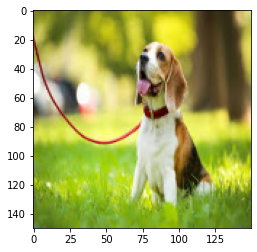

time: 29.3 s (started: 2021-02-20 16:19:16 +00:00)


In [ ]:
# 5. Predict for new Image  
flat_data = []
url = input('Enter the URL') 
img1 = imread(url)
img_resized = resize(img1,(150,150,3)) 
flat_data.append(img_resized.flatten())
Flat_data =np.array(flat_data)
print(img1.shape)
plt.imshow(img_resized)
y_out = model.predict(Flat_data)
y_out = CATEGORY[y_out[0]]
print(f'The Predicted Output : {y_out}')